# zomato data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./datasets/zomato_data.csv")

In [3]:
data.head(6)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet


In [4]:
data.shape

(148, 7)

In [5]:
# check null values
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# convert the data type of rating column

In [6]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [7]:
data['rate'] = data['rate'].apply(handleRate)

In [8]:
data.head(6)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet


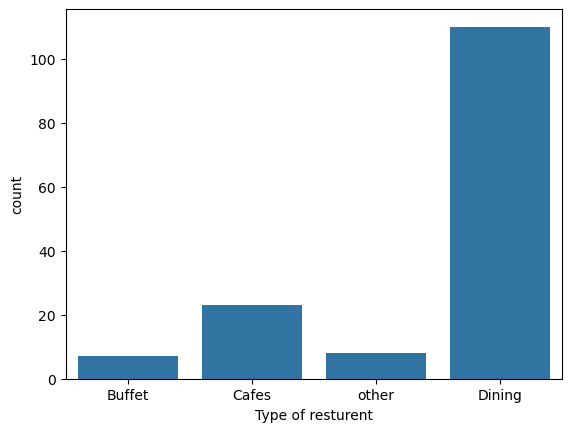

In [9]:
# majority of people choosing which kind of retsurent
sns.countplot(x = data['listed_in(type)'] )
plt.xlabel("Type of resturent")
plt.show()

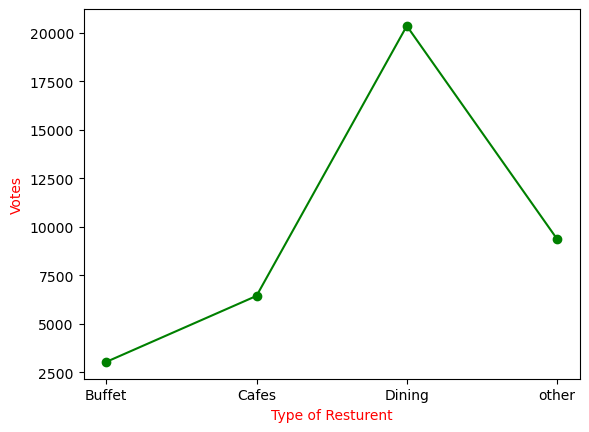

In [10]:
grouped_data = data.groupby("listed_in(type)")["votes"].sum()

result = pd.DataFrame({"votes":grouped_data})

plt.plot(result , color="green" , marker="o")

plt.xlabel("Type of Resturent" , color="red")

plt.ylabel("Votes",color="red")

plt.show()

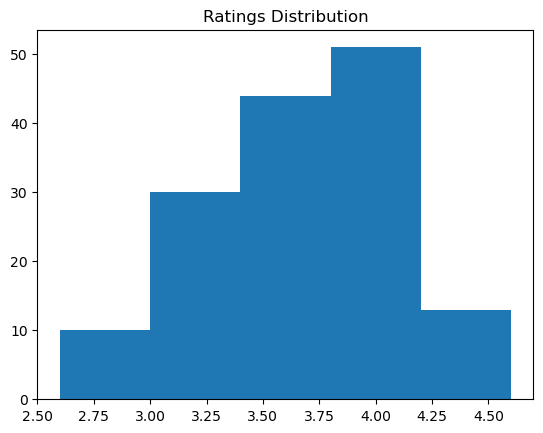

In [11]:
plt.hist(data["rate"] , bins=5)
plt.title("Ratings Distribution")
plt.show()

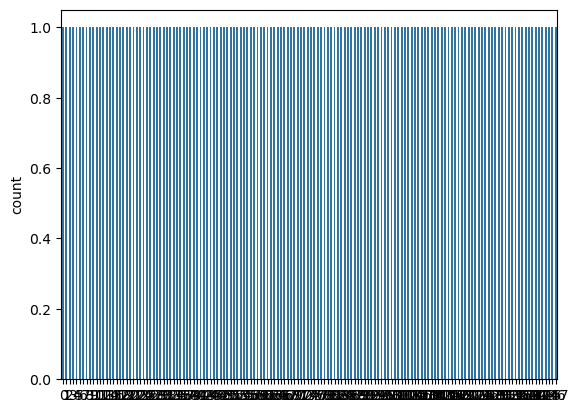

In [12]:
couple_data = data["approx_cost(for two people)"]
sns.countplot(couple_data,gap=0.3)

plt.show()

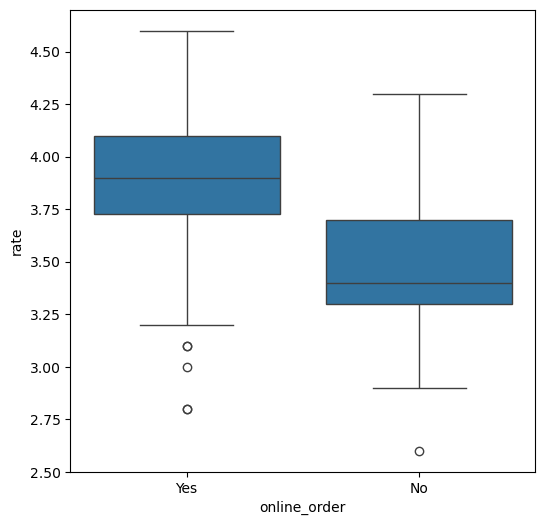

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order" , y="rate" ,data = data)
plt.show()